<a href="https://colab.research.google.com/github/adityayadav4507/Foundation_of_ML/blob/main/25_RMSprop_GD_v_s_BGD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [221]:
import numpy as np
import matplotlib.pyplot as plt


# Define loss function

In [222]:
def quadratic_loss(x,y):
  return x**2+10*y**2

# Gradient of loss function

In [223]:
def grad_quadratic_loss(x,y):
  dx=2*x
  dy=20*y
  return np.array([dx,dy])

# Batch Gradient Descent(BGD)

In [224]:
def BGD(grad_fun,lr,epochs, starting_point):
  x,y= starting_point
  path=[(x,y)]
  losses=[quadratic_loss(x,y)]

  for i in range(epochs):
    grad=grad_fun(x,y)
    x-=lr*grad[0]
    y-=lr*grad[1]
    path.append((x,y))
    losses.append(quadratic_loss(x,y))
  return np.array(path),losses


# RMSprop Gradient Descent

In [225]:
def RMSprop(grad_fun,lr,epochs, starting_point,beta ):
  x,y=starting_point
  path=[(x,y)]
  losses=[quadratic_loss(x,y)]
  Eg2=np.array([0.0,0.0])    # moving avg of squard gradient

  for i in range(epochs):
    grad=grad_fun(x,y)
    Eg2=beta*Eg2+(1-beta)*(grad**2)
    x-=lr*grad[0] / (np.sqrt(Eg2[0])+1e-8)
    y-=lr*grad[1] / (np.sqrt(Eg2[1])+1e-8)

    path.append((x,y))
    losses.append(quadratic_loss(x,y))
  return np.array(path),losses


# visulization of path

In [226]:
def plot_path(function, paths , labels , title):
  x,y=np.meshgrid(np.linspace(-2,2,400),np.linspace(-2,2,400))
  z=function(x,y)

  plt.figure(figsize=(8,6))
  plt.contour(x,y,z,levels=50,cmap='jet')

  for path , label in zip(paths , labels):
     plt.plot(path[:,0],path[:,1],label=label)
     plt.scatter(path[0,0],path[0,1] , color='green', label="start")
     plt.scatter(path[-1,0],path[-1,1] , color='red', label="end")
  plt.legend()
  plt.title(title)
  plt.xlabel('x')
  plt.ylabel('y')
  plt.show()


# visulization of loss

In [227]:
def plot_loss(losses , labels , title):
  plt.figure(figsize=(8,6))

  for loss , label in zip(losses,labels):
    plt.plot(loss,label=label)

  plt.legend()
  plt.title(title)
  plt.xlabel('epoch')
  plt.ylabel('loss')
  plt.show()


# parameters

In [228]:
lr=0.1 # learning rate
starting_point=[2.5,2.5] # starting point
epochs=50 #iteration
beta=0.9 # coefficent how much % of previous Eg2 contain in current Eg2

# Run optimization

In [229]:
path_bgd , loss_bgd =BGD(grad_quadratic_loss, lr ,epochs, starting_point)
path_rms , loss_rms =RMSprop(grad_quadratic_loss,lr,epochs, starting_point,beta)

# plot result

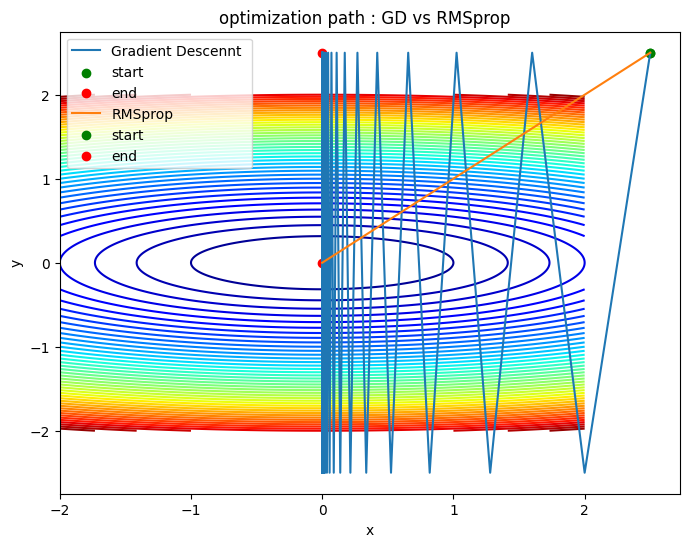

In [230]:
plot_path(quadratic_loss,[path_bgd ,path_rms],
          ["Gradient Descennt " , "RMSprop" ],
          "optimization path : GD vs RMSprop  ")



# leraning rate is low then GD is slowly apporch and loss is low whereas learning rate
# is intermidate then the RMSprop is best reaching faster without oscillation


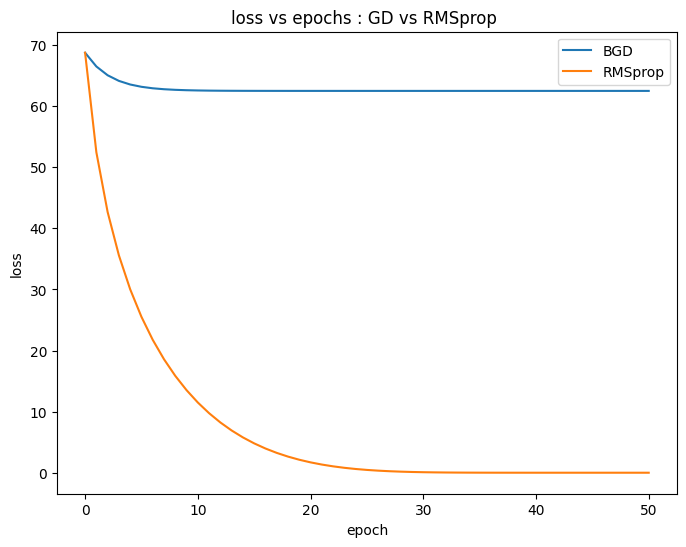

In [231]:
plot_loss([loss_bgd,loss_rms],
          ["BGD" , "RMSprop"],
          "loss vs epochs : GD vs RMSprop ")